Testing llama3.2:1b with prompt: What is artificial intelligenc...
Testing llama3.2:1b with prompt: Write a simple Python function...
Testing llama3.2:1b with prompt: Explain the process of digesti...
Testing llama3.2:1b with prompt: What are greenhouse gases and ...
Testing llama3.2:1b with prompt: Describe the main characters i...
Testing llama3.2:1b with prompt: What is machine learning and h...
Testing llama3.2:1b with prompt: Write a Python function that c...
Testing llama3.2:1b with prompt: Describe how DNA replication o...
Testing llama3.2:1b with prompt: What are the key differences b...
Testing llama3.2:1b with prompt: Summarize the themes of George...
Testing llama3.2:1b with prompt: Discuss how reinforcement lear...
Testing llama3.2:1b with prompt: Write a Python program that im...
Testing llama3.2:1b with prompt: Explain the mechanisms of gene...
Testing llama3.2:1b with prompt: Analyze the impact of deforest...
Testing llama3.2:1b with prompt: Critically analyze the portra

Model,Prompt,Response Time,Word Count,Relevance Score,Response
llama3.2:1b,What is artificial intelligence and give an example of how it's used in daily life?,54.971355,326,1,"Artificial intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as understanding language, recognizing images, making decisions, and learning from data. AI systems use algorithms and statistical models to analyze data and make predictions or take actions.\n\nHere's an example of how AI is used in daily life:\n\n**Example:** Virtual Personal Assistants\n\nVirtual personal assistants like Siri, Google Assistant, and Alexa are powered by AI technology. These virtual assistants use natural language processing (NLP) to understand voice commands and respond accordingly. For instance, when you ask Siri ""What's the weather like today?"", it uses NLP to analyze your voice and generate a response based on current weather data.\n\n**How they work:**\n\n1. Speech recognition: You speak into the device, and it converts your words into digital signals.\n2. Intent detection: The device analyzes your speech to determine what you wan..."
llama3.2:1b,Write a simple Python function to return the sum of two numbers.,26.008774,141,1,"Here is a simple Python function that returns the sum of two numbers:\n\n```python\ndef add_numbers(num1, num2):\n """"""\n Returns the sum of two numbers.\n\n Args:\n num1 (int or float): The first number.\n num2 (int or float): The second number.\n\n Returns:\n int or float: The sum of num1 and num2.\n """"""\n\n # Check if both inputs are numbers\n if not isinstance(num1, (int, float)) or not isinstance(num2, (int, float)):\n raise TypeError(""Both inputs must be numbers"")\n\n # Calculate the sum\n total = num1 + num2\n\n return total\n```\n\nYou can use this function like this:\n\n```python\n# Add two integers\nprint(add_numbers(5, 7)) # Output: 12\n\n# Add a float and an integer\nprint(add_numbers(3.5, 5)) # Output: 8.5\n\n# Try adding a non-numeric value with one of the numbers\ntry:\n print(add_numbers('hello', 3))\nexcept TypeError as e:\n print(e) # Output: Both inputs must be numbers\n```"
llama3.2:1b,Explain the process of digestion in humans.,44.626076,330,1,"The process of digestion in humans is a complex series of chemical and physical changes that occur in the mouth, esophagus, stomach, small intestine, and large intestine. Here's an overview of how it works:\n\n**Mouth (oral cavity)**\n\n1. Food enters the mouth through chewing and mastication.\n2. The teeth break down food into smaller particles called chyme.\n3. Saliva, containing enzymes like amylase and lipase, helps to break down carbohydrates and fats.\n4. Pancreatic juice and gastric acid are released from the pancreas and stomach, respectively, to further digest carbohydrates and proteins.\n\n**Esophagus**\n\n1. Food is swallowed into the esophagus.\n2. The muscular tube propels food into the stomach through peristalsis (a wave-like muscle contraction).\n\n**Stomach (gastric cavity)**\n\n1. Food enters the stomach, where it's mixed with gastric juices containing hydrochloric acid (HCl) and pepsin.\n2. Pepsin breaks down proteins into smaller peptides.\n3. The mixture is then churned by peristalsi..."
llama3.2:1b,What are greenhouse gases and how do they affect the environment?,48.235805,367,1,"Greenhouse gases (GHGs) are gases in the Earth's atmosphere that absorb and emit heat, leading to a warming effect on the planet. They are called ""greenhouse"" because they help keep the Earth's temperature warm enough to support life as we know it.\n\nThe main greenhouse gases are:\n\n1. Carbon dioxide (CO2): Released through human activities like burning fossil fuels, deforestation, and land-use changes.\n2. Methane (CH4): Released through agriculture, natural gas production and transport, and landfills.\n3. Nitrous oxide (N2O): Released through agriculture, industrial processes, and the use of ni

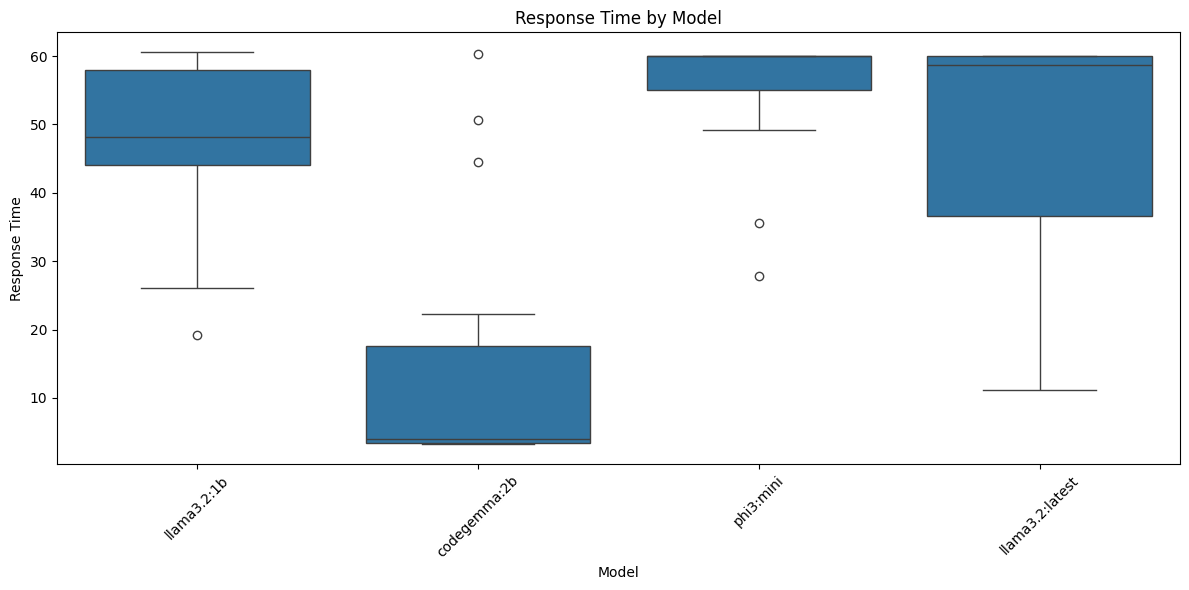

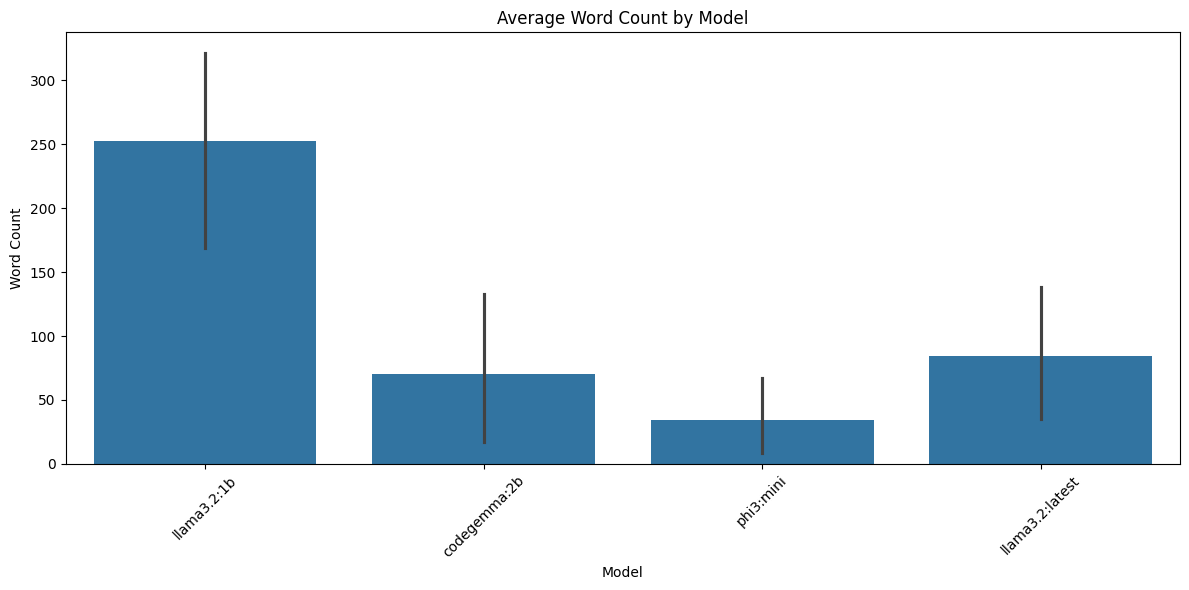

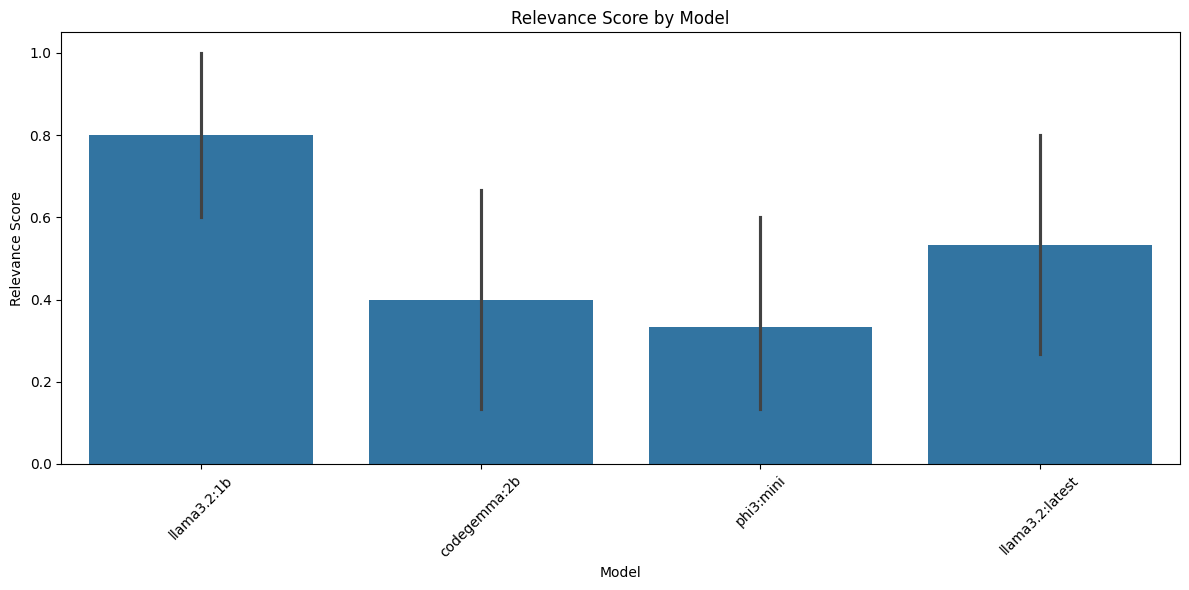

ValueError: Length of values (15) does not match length of index (60)

In [1]:
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

def run_ollama_api(model, prompt, timeout=60):
    url = "http://localhost:11434/api/generate"
    headers = {"Content-Type": "application/json"}
    data = {
        "model": model,
        "prompt": prompt,
        "stream": False
    }
    
    start_time = time.time()
    try:
        response = requests.post(url, json=data, headers=headers, timeout=timeout)
        response.raise_for_status()
        end_time = time.time()
        result = response.json()
        return result.get('response', ''), end_time - start_time
    except requests.exceptions.Timeout:
        return "Timeout", timeout
    except requests.exceptions.RequestException as e:
        return f"Error: {str(e)}", timeout

def count_words(text):
    return len(text.split())

def evaluate_response(response, prompt):
    relevance_score = 1 if any(word in response.lower() for word in prompt.lower().split()) else 0
    return relevance_score

models = ["llama3.2:1b", "codegemma:2b", "phi3:mini", "llama3.2:latest"]
prompts = [
    # Easy Level
    "What is artificial intelligence and give an example of how it's used in daily life?",
    "Write a simple Python function to return the sum of two numbers.",
    "Explain the process of digestion in humans.",
    "What are greenhouse gases and how do they affect the environment?",
    "Describe the main characters in 'The Three Little Pigs.'",
    
    # Medium Level
    "What is machine learning and how is it different from traditional programming?",
    "Write a Python function that calculates the factorial of a given number using recursion.",
    "Describe how DNA replication occurs in a cell.",
    "What are the key differences between renewable and non-renewable energy sources?",
    "Summarize the themes of George Orwell's '1984.'",
    
    # Hard Level
    "Discuss how reinforcement learning is used in autonomous vehicles.",
    "Write a Python program that implements the quicksort algorithm and explain its time complexity.",
    "Explain the mechanisms of genetic mutation and how it contributes to evolution.",
    "Analyze the impact of deforestation on biodiversity and the global carbon cycle.",
    "Critically analyze the portrayal of existentialism in Albert Camus's 'The Stranger.'"
]


results = []

def run_test(model, prompt):
    print(f"Testing {model} with prompt: {prompt[:30]}...")
    response, response_time = run_ollama_api(model, prompt)
    word_count = count_words(response)
    relevance_score = evaluate_response(response, prompt)
    
    result = {
        "Model": model,
        "Prompt": prompt,
        "Response Time": response_time,
        "Word Count": word_count,
        "Relevance Score": relevance_score,
        "Response": response[:1000] + "..." if len(response) > 1000 else response  # Store first 100 chars of response
    }
    results.append(result)
    return result

def display_results():
    df = pd.DataFrame(results)
    display(HTML(df.to_html(index=False)))
    
    # Response Time Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Model", y="Response Time", data=df)
    plt.title("Response Time by Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Word Count Barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Model", y="Word Count", data=df)
    plt.title("Average Word Count by Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Relevance Score Barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Model", y="Relevance Score", data=df)
    plt.title("Relevance Score by Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Difficulty-Level Comparison
    df['Difficulty Level'] = ['Easy'] * 5 + ['Medium'] * 5 + ['Hard'] * 5
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Difficulty Level", y="Response Time", hue="Model", data=df)
    plt.title("Response Time by Difficulty Level")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Response Time Distribution
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Model", y="Response Time", data=df)
    plt.title("Response Time Distribution by Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Statistical Summaries
    print("Average Response Time by Model:")
    print(df.groupby("Model")["Response Time"].mean().sort_values(ascending=False))

    print("\nAverage Word Count by Model:")
    print(df.groupby("Model")["Word Count"].mean().sort_values(ascending=False))

    print("\nStandard Deviation of Response Time by Model:")
    print(df.groupby("Model")["Response Time"].std())

    print("\nStandard Deviation of Word Count by Model:")
    print(df.groupby("Model")["Word Count"].std())

    print("\nSample Responses:")
    for _, row in df.iterrows():
        print(f"{row['Model']} - {row['Prompt'][:30]}...: {row['Response']}")


# Run a single test
# result = run_test(models[0], prompts[0])
# print(result)


for model in models:
    for prompt in prompts:
        run_test(model, prompt)
display_results()


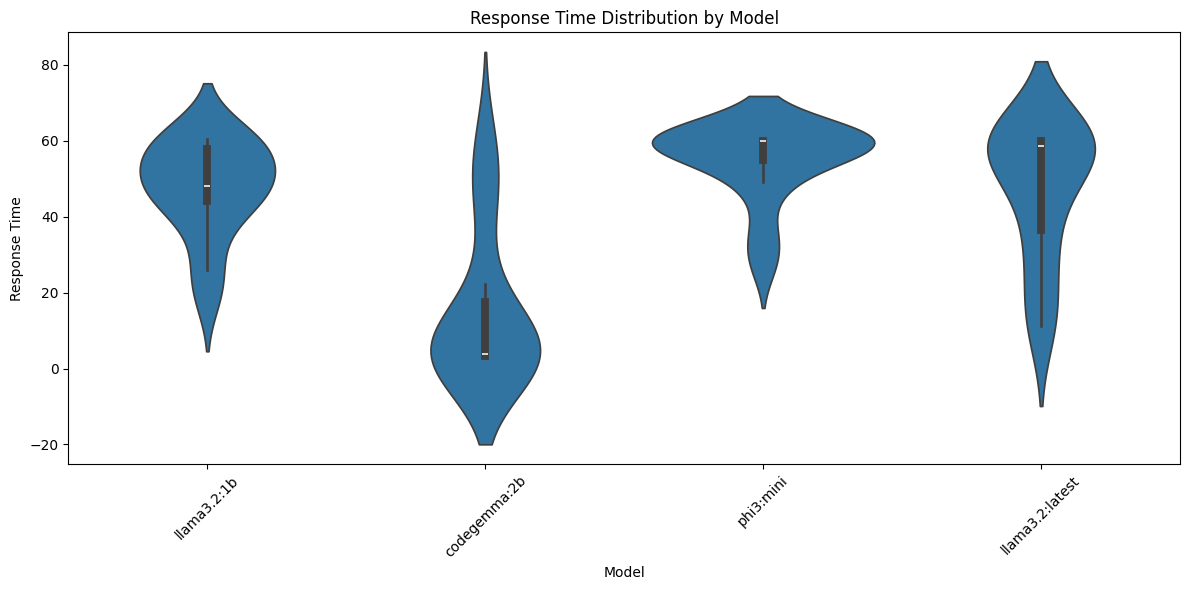

Average Response Time by Model:
Model
phi3:mini          54.842993
llama3.2:1b        47.568002
llama3.2:latest    46.987047
codegemma:2b       15.088757
Name: Response Time, dtype: float64

Average Word Count by Model:
Model
llama3.2:1b        252.400000
llama3.2:latest     84.333333
codegemma:2b        70.400000
phi3:mini           34.200000
Name: Word Count, dtype: float64

Standard Deviation of Response Time by Model:
Model
codegemma:2b       19.903092
llama3.2:1b        12.521717
llama3.2:latest    18.027334
phi3:mini          10.168588
Name: Response Time, dtype: float64

Standard Deviation of Word Count by Model:
Model
codegemma:2b       129.636745
llama3.2:1b        155.527581
llama3.2:latest    106.318031
phi3:mini           61.514458
Name: Word Count, dtype: float64

Sample Responses:
llama3.2:1b - What is artificial intelligenc...: Artificial intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such

In [3]:
df = pd.DataFrame(results)    
# Response Time Distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x="Model", y="Response Time", data=df)
plt.title("Response Time Distribution by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical Summaries
print("Average Response Time by Model:")
print(df.groupby("Model")["Response Time"].mean().sort_values(ascending=False))

print("\nAverage Word Count by Model:")
print(df.groupby("Model")["Word Count"].mean().sort_values(ascending=False))

print("\nStandard Deviation of Response Time by Model:")
print(df.groupby("Model")["Response Time"].std())

print("\nStandard Deviation of Word Count by Model:")
print(df.groupby("Model")["Word Count"].std())

print("\nSample Responses:")
for _, row in df.iterrows():
    print(f"{row['Model']} - {row['Prompt'][:30]}...: {row['Response']}")